# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

# mean

In [13]:
# import numpy just to check if the functions are working correctly
import numpy as np
## putting sales into a list
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

## writing a function that gets the mean of any list
def mean(list):
  return sum(list)/len(list)
  
mean(sales)
    

3052.714285714286

In [14]:
## check to see if mean function works
np.mean(sales)

3052.714285714286

#variance

In [35]:
## function that returns the variance of a list
def variance(list):
  N = len(list)
  m = mean(list)
  mean_dist = [i-m for i in list]
  sq_dist = [i**2 for i in mean_dist]
  var = sum(sq_dist) / (N-1)
  return var

variance(sales)

214387.90476190473

In [36]:
## check if variance function works - difference lies in using different populations
np.var(sales)

183761.06122448976

#standard deviation

In [37]:
## function to find standard deviation
def stdeviation(list):
  return variance(list)**(1/2)

stdeviation(sales)

463.0204150595357

In [38]:
## check to see if function works - difference lies in using different populations
np.std(sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [39]:
customers = [127, 80, 105, 92, 120, 115, 93]

np.cov(sales, customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

covariance between last week's sales numbers and the number of customers that eneterd the store last week = **7604.35714286**

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# get standard deviation for both lists
std_customers = stdeviation(customers)
std_sales = stdeviation(sales)


the formula for. the correlation coefficient:
\begin{align}
r = \frac{cov(X,Y)}{\sigma_{X}\sigma_{Y}}
\end{align}

In [41]:
# calculate correlation coefficent based on formula above
cov_sales_customers = 7604.35714286
r_sales_customers = cov_sales_customers/(std_customers * std_sales)
r_sales_customers

0.9628339778152527

In [42]:
## check to see if calculations are correct
np.corrcoef(customers, sales)

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
## import pandas and read csv into a dataframe
import pandas as pd

titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [47]:
## produce the variance/ covariance matrix for the dataset
titanic_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-2, 2)

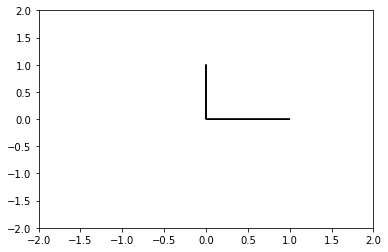

In [56]:
## orthogonal can also mean perpendicular
import matplotlib.pyplot as plt

plt.arrow(0,0,0,1)
plt.arrow(0,0,1,0)

plt.xlim(-2,2)
plt.ylim(-2,2)

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [58]:
a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a,b)

-40

No, they are not orthogonal because the dot product is not equal to 0 - meaning the two planes would not be perpendicular to each other

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
c = [2, -15, 6, 20]

In [62]:
# norm of a vector squared
(np.linalg.norm(c))**2

665.0

In [64]:
## dot product
np.dot(c,c)

665

In [66]:
## c transposed times c
np.matmul(np.transpose(c), c)

665

They are all equal values

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

d as a linear combination of scalars and unit vectors
\begin{align}
d = \begin{bmatrix} 7 \\ 12\end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}



e as a linear combination of scalars and unit vectors
\begin{align}
e = \begin{bmatrix} 2 \\ 11\\-8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\0\end{bmatrix}-8\begin{bmatrix}0\\0\\1\end{bmatrix} = 2\hat{i} + 11\hat{j}-8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [72]:
f = [4,12,11,9,2]
norm_f = np.linalg.norm(f)
norm_f

19.131126469708992

 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{19.13}\begin{bmatrix} 4 \\ 12 \\  11\\9\\2 \end{bmatrix} = \begin{bmatrix} \frac{4}{19.13} \\ \frac{12}{19.13} \\  \frac{11}{19.13} \\ \frac{9}{19.13}\\ \frac{2}{19.13}\end{bmatrix}
\end{align}

In [76]:
np.multiply(f, (1/norm_f))

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

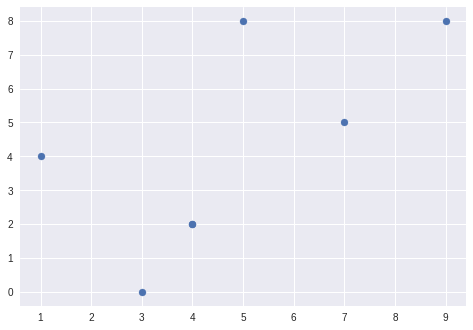

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()